In [19]:
# Primary imports for reading data and exploration.
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Primary imports for machine learning.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

# Format for print outs.
fmt = '{:<30} {:}'

# Code to retrieve any CSV file within folder.
DIRECTORY = os.getcwd()
for root, dirs, files in os.walk(DIRECTORY):
    for file in files:
        if file.endswith(".csv"):
            csv = file

# Read CSV file and load data.
df = pd.read_csv(csv)

# Check for null and duplicates within data.
total_rows = len(df)
null_counts = df.isnull().sum()
null_percent = (null_counts / total_rows) * 100
duplicate_count = df.duplicated().sum()
duplicate_percent = (duplicate_count / total_rows) * 100

# Read results and warn if they are over 1%.
if any(null_percent > 1):
    print("ERROR: Too many NULL values.")
else:
    df.dropna(inplace=True)

if duplicate_percent > 1:
    print("ERROR: Too many duplicate rows.")
else:
    df.drop_duplicates(inplace=True)

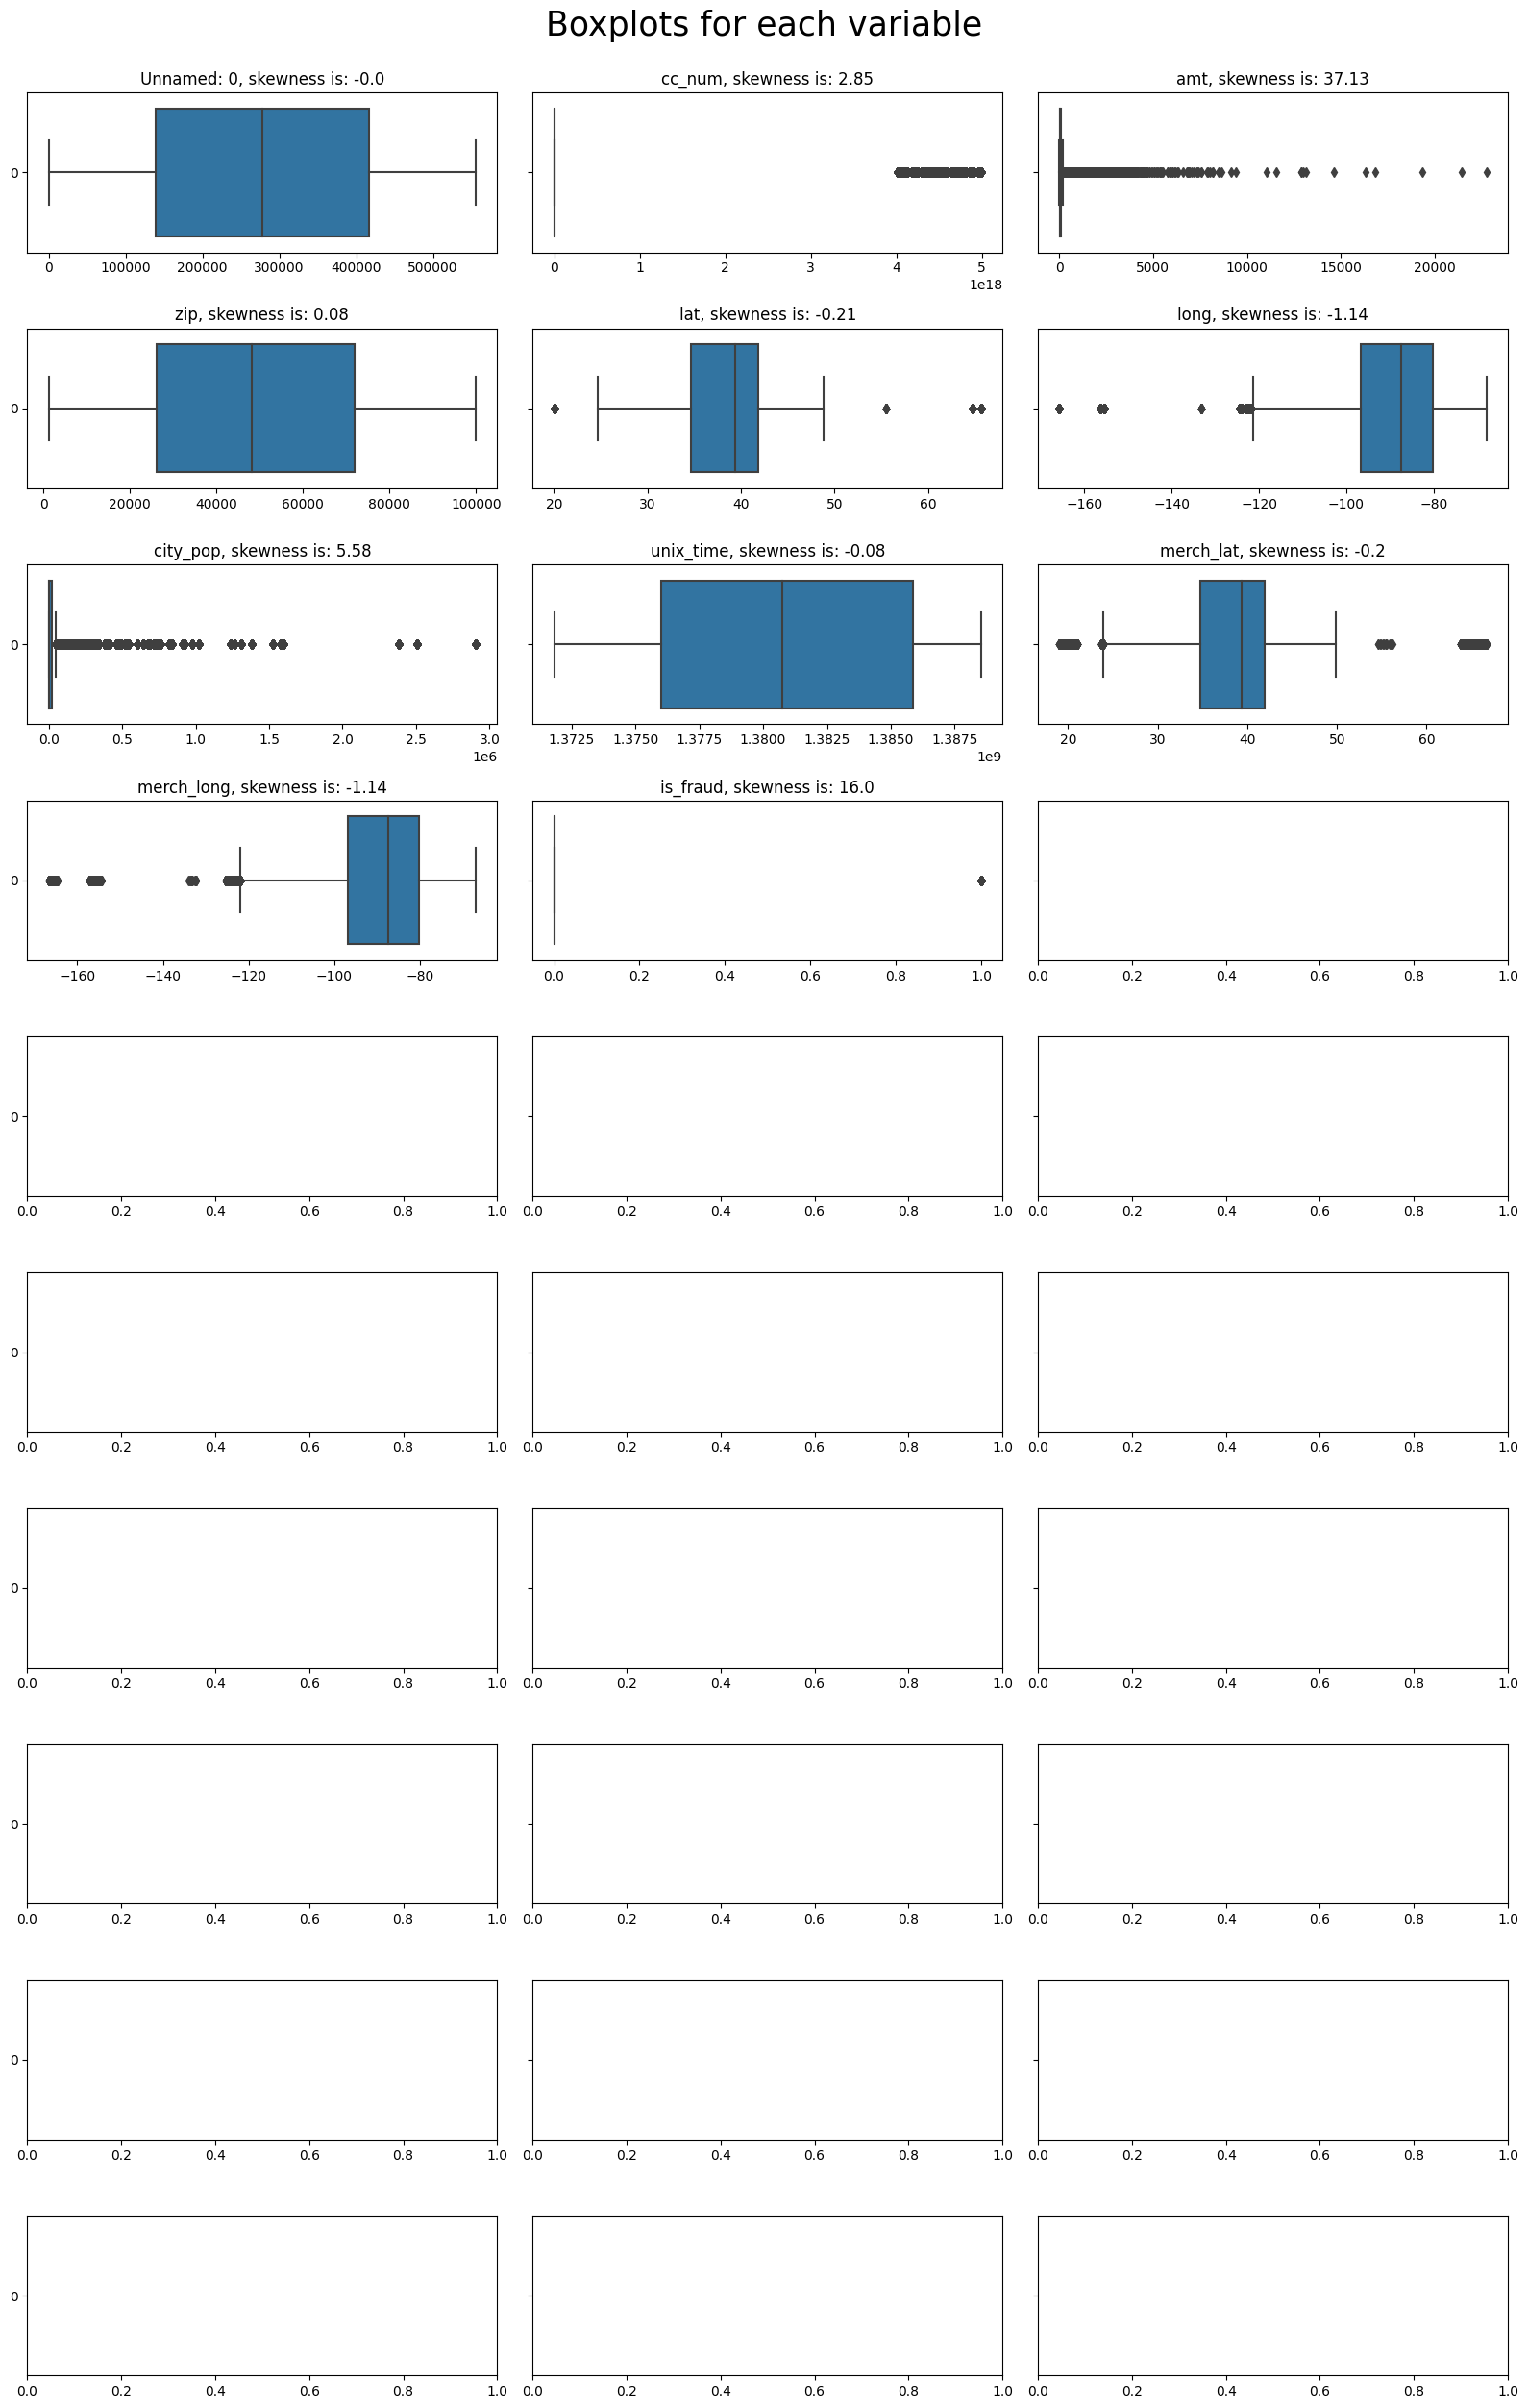

In [20]:
def skew_box_check(dataset, rows, cols, suptitle):
    """ Function to check for skew.
    ------------------------------------------------------------------------"""
    fig, axs = plt.subplots(rows, cols, sharey = True, figsize = (16, 25))
    fig.suptitle(suptitle, y = 1, size = 25)
    axs = axs.flatten()

    numeric_columns = dataset.select_dtypes(include = 'number').columns.tolist()

    for i, data in enumerate(numeric_columns):
        sns.boxplot(data = dataset[data], orient = 'h', ax = axs[i])
        axs[i].set_title(data + ', skewness is: ' + str(round(dataset[data].skew(axis = 0, skipna = True), 2)))

skew_box_check(dataset = df, rows = 10, cols = 3, suptitle = 'Boxplots for each variable')
plt.tight_layout()
plt.show()

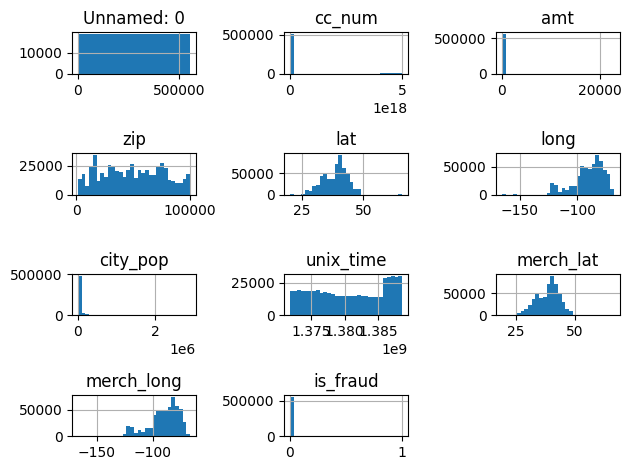

In [21]:
df.hist(bins = 30)
plt.tight_layout()

In [22]:
df['datetime'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

df['trans_date'] = df['datetime'].dt.date
df['trans_time'] = df['datetime'].dt.time

In [23]:
print(df.head(n = 10))
print(df.describe())

df.corr()

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   
5           5   2020-06-21 12:15:37    30407675418785   
6           6   2020-06-21 12:15:44   213180742685905   
7           7   2020-06-21 12:15:50  3589289942931264   
8           8   2020-06-21 12:16:10  3596357274378601   
9           9   2020-06-21 12:16:11  3546897637165774   

                               merchant        category     amt     first  \
0                 fraud_Kirlin and Sons   personal_care    2.86      Jeff   
1                  fraud_Sporer-Keebler   personal_care   29.84    Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28    Ashley   
3                     fraud_Haley Group        misc_pos   60.05 

C:\Users\mrpog\AppData\Local\Temp\ipykernel_6728\2299209588.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,-0.000823,-0.001137,0.001479,0.000336,-0.001558,-0.000794,0.997054,0.000394,-0.001586,-0.013892
cc_num,-0.000823,1.000000,0.001963,0.041610,-0.057512,-0.048783,-0.009414,-0.000810,-0.057183,-0.048818,-0.001540
amt,-0.001137,0.001963,1.000000,0.002310,0.002339,-0.002046,0.002760,-0.000974,0.002404,-0.002053,0.182267
zip,0.001479,0.041610,0.002310,1.000000,-0.115173,-0.909942,0.075571,0.001395,-0.114809,-0.909117,-0.002271
lat,0.000336,-0.057512,0.002339,-0.115173,1.000000,-0.012892,-0.152666,0.000301,0.993557,-0.012831,0.005863
long,-0.001558,-0.048783,-0.002046,-0.909942,-0.012892,1.000000,-0.051524,-0.001460,-0.012551,0.999115,-0.000972
city_pop,-0.000794,-0.009414,0.002760,0.075571,-0.152666,-0.051524,1.000000,-0.000740,-0.151703,-0.051489,-0.004910
unix_time,0.997054,-0.000810,-0.000974,0.001395,0.000301,-0.001460,-0.000740,1.000000,0.000365,-0.001485,-0.013066
merch_lat,0.000394,-0.057183,0.002404,-0.114809,0.993557,-0.012551,-0.151703,0.000365,1.000000,-0.012496,0.005812
merch_long,-0.001586,-0.048818,-0.002053,-0.909117,-0.012831,0.999115,-0.051489,-0.001485,-0.012496,1.000000,-0.001060


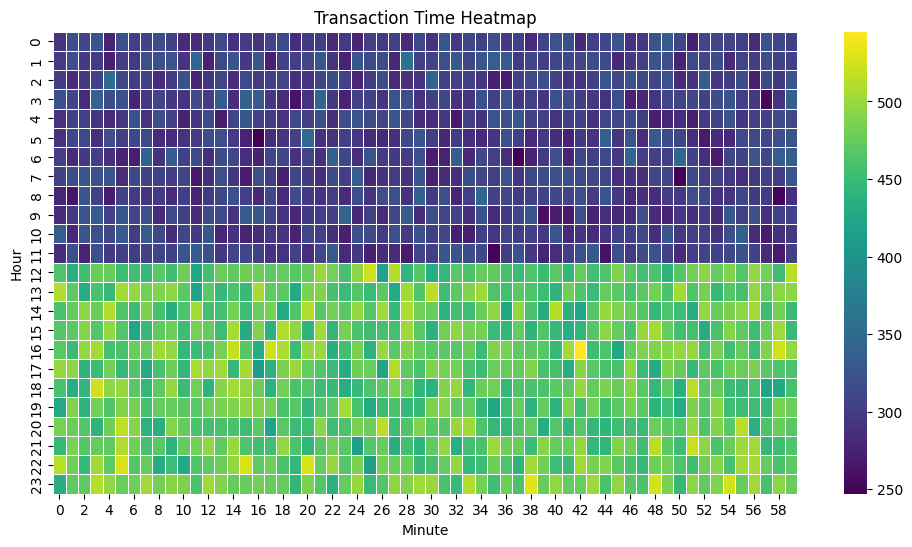

In [24]:
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S')

df['Hour'] = df['trans_time'].dt.hour
df['Minute'] = df['trans_time'].dt.minute

heatmap_data = pd.pivot_table(df, values=None, index='Hour', columns='Minute', aggfunc='size')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt='d', linewidths=0.5, cbar=True)
plt.title('Transaction Time Heatmap')
plt.xlabel('Minute')
plt.ylabel('Hour')
plt.show()

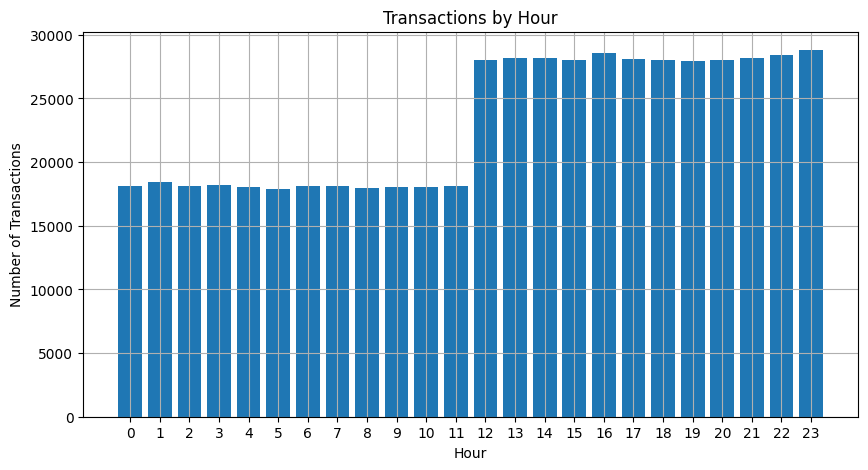

In [25]:
hour_counts = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(hour_counts.index, hour_counts.values)
plt.title('Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.grid(True)
plt.show()

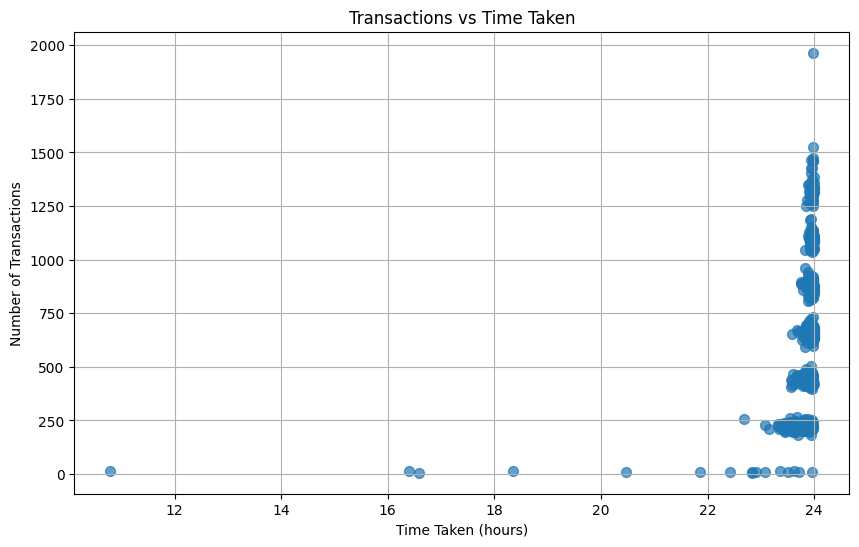

In [26]:
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S')
transaction_counts = df.groupby(['first', 'last']).size()

time_taken = df.groupby(['first', 'last'])['trans_time'].agg(lambda x: (max(x) - min(x)).total_seconds() / 3600)

plt.figure(figsize=(10, 6))
plt.scatter(time_taken, transaction_counts, s=50, alpha=0.7)
plt.title('Transactions vs Time Taken')
plt.xlabel('Time Taken (hours)')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


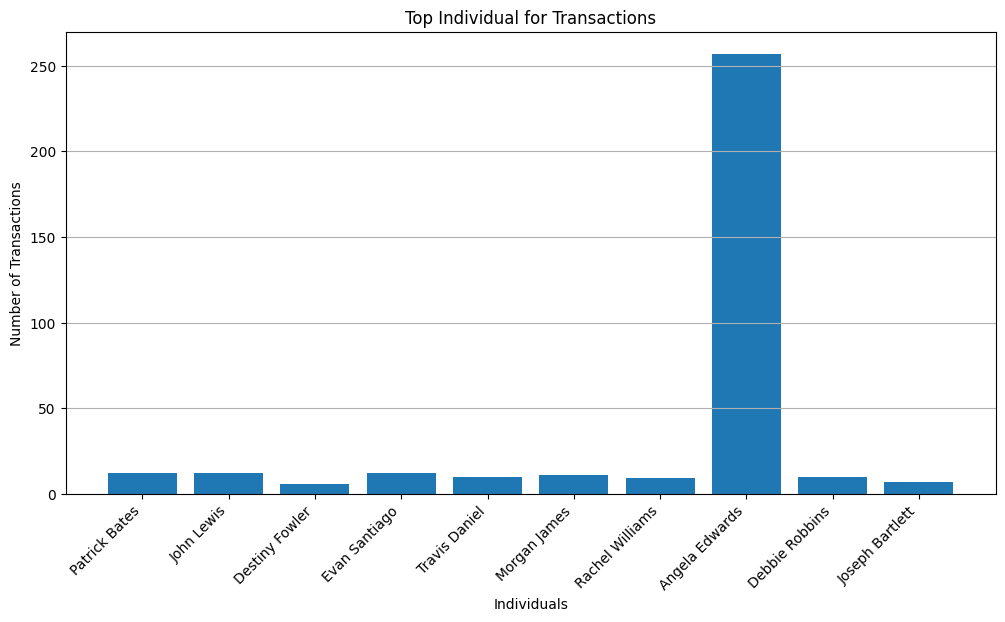

In [27]:
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S')

transaction_counts = df.groupby(['first', 'last']).size()
time_taken = df.groupby(['first', 'last'])['trans_time'].agg(lambda x: (max(x) - min(x)).total_seconds())

result_df = pd.DataFrame({'Number of Transactions': transaction_counts, 'Time Taken (seconds)': time_taken})
result_df = result_df.sort_values(by='Time Taken (seconds)')

result_df['Individual'] = result_df.index.map(lambda x: f"{x[0]} {x[1]}")

top_individuals = result_df.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_individuals['Individual'], top_individuals['Number of Transactions'])
plt.title('Top Individual for Transactions')
plt.xlabel('Individuals')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [28]:
# Read CSV file and load data.
df = pd.read_csv(csv)
df.drop_duplicates(inplace=True)

def preprocess_data(df, features, target):
    """ Function to process data pre-test, using the selected variables listed at end.
        Fixes datetime error within trans_date_trans_time.
    ------------------------------------------------------------------------"""
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time']).astype(np.int64)
    
    # Select desired features and target variable
    X = df[features]
    y = df[target]
    
    return X, y

def random_forest_fraud_detection(features, target):
    """ Function to process data pre-test, using the selected variables listed at end.
    ------------------------------------------------------------------------"""
    X, y = preprocess_data(df, features, target)

    # Split data into train and test sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)

    # Evaluation statistics for train set.
    accuracy_train         = round(accuracy_score(y_train, y_pred_train), 2)
    mae_train              = round(mean_absolute_error(y_train, y_pred_train), 2)
    mse_train              = round(mean_squared_error(y_train, y_pred_train), 2)
    rmse_train             = round(np.sqrt(mse_train), 2)
    r2_train               = round(r2_score(y_train, y_pred_train), 2)
    precision_train        = round(precision_score(y_train, y_pred_train), 2)
    recall_train           = round(recall_score(y_train, y_pred_train), 2)
    f1_train               = round(f1_score(y_train, y_pred_train), 2)
    confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

    # Evaluation statistics for test set.
    accuracy_test          = round(accuracy_score(y_test, y_pred_test), 2)
    mae_test               = round(mean_absolute_error(y_test, y_pred_test), 2)
    mse_test               = round(mean_squared_error(y_test, y_pred_test), 2)
    rmse_test              = round(np.sqrt(mse_test), 2)
    r2_test                = round(r2_score(y_test, y_pred_test), 2)
    precision_test         = round(precision_score(y_test, y_pred_test), 2)
    recall_test            = round(recall_score(y_test, y_pred_test), 2)
    f1_test                = round(f1_score(y_test, y_pred_test), 2)
    confusion_matrix_test  = confusion_matrix(y_test, y_pred_test)

    # Formatted train results:
    print(f"Random Forest Train Results:")
    print(fmt.format("Accuracy =", accuracy_train))
    print(fmt.format("Mean Absolute Error =", mae_train))
    print(fmt.format("Root Mean Squared Error =", rmse_train))
    print(fmt.format("Mean Squared Error =", mse_train))
    print(fmt.format("R-squared =", r2_train))
    print(fmt.format("Precision =", precision_train))
    print(fmt.format("Recall =", recall_train))
    print(fmt.format("F1-score =", f1_train))
    print("\nConfusion Matrix - Training Set:")
    print(confusion_matrix_train)

    # Formatted test results:
    print("\nRandom Forest Test Results:")
    print(fmt.format("Accuracy =", accuracy_test))
    print(fmt.format("Mean Absolute Error =", mae_test))
    print(fmt.format("Root Mean Squared Error =", rmse_test))
    print(fmt.format("Mean Squared Error =", mse_test))
    print(fmt.format("R-squared =", r2_test))
    print(fmt.format("Precision =", precision_test))
    print(fmt.format("Recall =", recall_test))
    print(fmt.format("F1-score =", f1_test))
    print("\nConfusion Matrix - Test Set:")
    print(confusion_matrix_test)

# Feature targets.
features = ['amt'] # trans_date_trans_time amt zip
target = 'is_fraud'

# Call functions.
random_forest_fraud_detection(features, target)

Random Forest Train Results:
Accuracy =                     1.0
Mean Absolute Error =          0.0
Root Mean Squared Error =      0.0
Mean Squared Error =           0.0
R-squared =                    0.65
Precision =                    0.99
Recall =                       0.65
F1-score =                     0.79

Confusion Matrix - Training Set:
[[442844     12]
 [   595   1124]]

Random Forest Test Results:
Accuracy =                     1.0
Mean Absolute Error =          0.0
Root Mean Squared Error =      0.0
Mean Squared Error =           0.0
R-squared =                    -0.28
Precision =                    0.31
Recall =                       0.22
F1-score =                     0.25

Confusion Matrix - Test Set:
[[110507    211]
 [   333     93]]


In [29]:
def support_vector_machine_fraud_detection(features, target):
    """
    Function for Support Vector Machine fraud detection model test.
    ------------------------------------------------------------------------
    """
    # Preprocess data and select features
    X, y = preprocess_data(df, features, target)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Support Vector Machine
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred_train = svm_model.predict(X_train)
    y_pred_test = svm_model.predict(X_test)

    # Evaluation statistics for train set.
    accuracy_train         = round(accuracy_score(y_train, y_pred_train), 2)
    mae_train              = round(mean_absolute_error(y_train, y_pred_train), 2)
    mse_train              = round(mean_squared_error(y_train, y_pred_train), 2)
    rmse_train             = round(np.sqrt(mse_train), 2)
    r2_train               = round(r2_score(y_train, y_pred_train), 2)
    precision_train        = round(precision_score(y_train, y_pred_train), 2)
    recall_train           = round(recall_score(y_train, y_pred_train), 2)
    f1_train               = round(f1_score(y_train, y_pred_train), 2)
    confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

    # Evaluation statistics for test set.
    accuracy_test          = round(accuracy_score(y_test, y_pred_test), 2)
    mae_test               = round(mean_absolute_error(y_test, y_pred_test), 2)
    mse_test               = round(mean_squared_error(y_test, y_pred_test), 2)
    rmse_test              = round(np.sqrt(mse_test), 2)
    r2_test                = round(r2_score(y_test, y_pred_test), 2)
    precision_test         = round(precision_score(y_test, y_pred_test), 2)
    recall_test            = round(recall_score(y_test, y_pred_test), 2)
    f1_test                = round(f1_score(y_test, y_pred_test), 2)
    confusion_matrix_test  = confusion_matrix(y_test, y_pred_test)

    # Formatted train results:
    print(f"Support Vector Machine Train Results:")
    print(fmt.format("Accuracy =", accuracy_train))
    print(fmt.format("Mean Absolute Error =", mae_train))
    print(fmt.format("Root Mean Squared Error =", rmse_train))
    print(fmt.format("Mean Squared Error =", mse_train))
    print(fmt.format("R-squared =", r2_train))
    print(fmt.format("Precision =", precision_train))
    print(fmt.format("Recall =", recall_train))
    print(fmt.format("F1-score =", f1_train))
    print("\nConfusion Matrix - Training Set:")
    print(confusion_matrix_train)

    # Formatted test results:
    print("\nSupport Vector Machine Test Results:")
    print(fmt.format("Accuracy =", accuracy_test))
    print(fmt.format("Mean Absolute Error =", mae_test))
    print(fmt.format("Root Mean Squared Error =", rmse_test))
    print(fmt.format("Mean Squared Error =", mse_test))
    print(fmt.format("R-squared =", r2_test))
    print(fmt.format("Precision =", precision_test))
    print(fmt.format("Recall =", recall_test))
    print(fmt.format("F1-score =", f1_test))
    print("\nConfusion Matrix - Test Set:")
    print(confusion_matrix_test)

# Specify features and target variables
features = ['amt']  # trans_date_trans_time amt zip
target = 'is_fraud'

# Execute the Support Vector Machine for fraud detection
support_vector_machine_fraud_detection(features, target)

Support Vector Machine Train Results:
Accuracy =                     1.0
Mean Absolute Error =          0.0
Root Mean Squared Error =      0.0
Mean Squared Error =           0.0
R-squared =                    0.01
Precision =                    0.52
Recall =                       0.16
F1-score =                     0.25

Confusion Matrix - Training Set:
[[442596    260]
 [  1436    283]]

Support Vector Machine Test Results:
Accuracy =                     1.0
Mean Absolute Error =          0.0
Root Mean Squared Error =      0.0
Mean Squared Error =           0.0
R-squared =                    0.02
Precision =                    0.54
Recall =                       0.18
F1-score =                     0.27

Confusion Matrix - Test Set:
[[110652     66]
 [   349     77]]


# Results
Basic results for the random forest models.

| Model | Training Features |Accuracy train| RMSE train | R2 train |Accuracy test| RMSE test | R2 test |
|:---|:---|:---|:---|:---|:---|:---|:---|
|Linear Regression|trans_date_trans_time & is_fraud|0.0|0.0|0.0|0.0|0.0|0.0|
|Random Forest|trans_date_trans_time & is_fraud|1.0|0.0|0.07|1.0|0.0|-0.23|
|Random Forest|amt & is_fraud|1.0|0.0|0.65|1.0|0.0|-0.28|
|Support Vector Machine|amt & is_fraud|1.0|0.0|0.01|1.0|0.0|0.02|

C:\Users\mrpog\AppData\Local\Temp\ipykernel_6728\305853201.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(metrics, rotation=45, ha='right')
C:\Users\mrpog\AppData\Local\Temp\ipykernel_6728\305853201.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(metrics, rotation=45, ha='right')
C:\Users\mrpog\AppData\Local\Temp\ipykernel_6728\305853201.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(metrics, rotation=45, ha='right')
C:\Users\mrpog\AppData\Local\Temp\ipykernel_6728\305853201.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(metrics, rotation=45, ha='right')


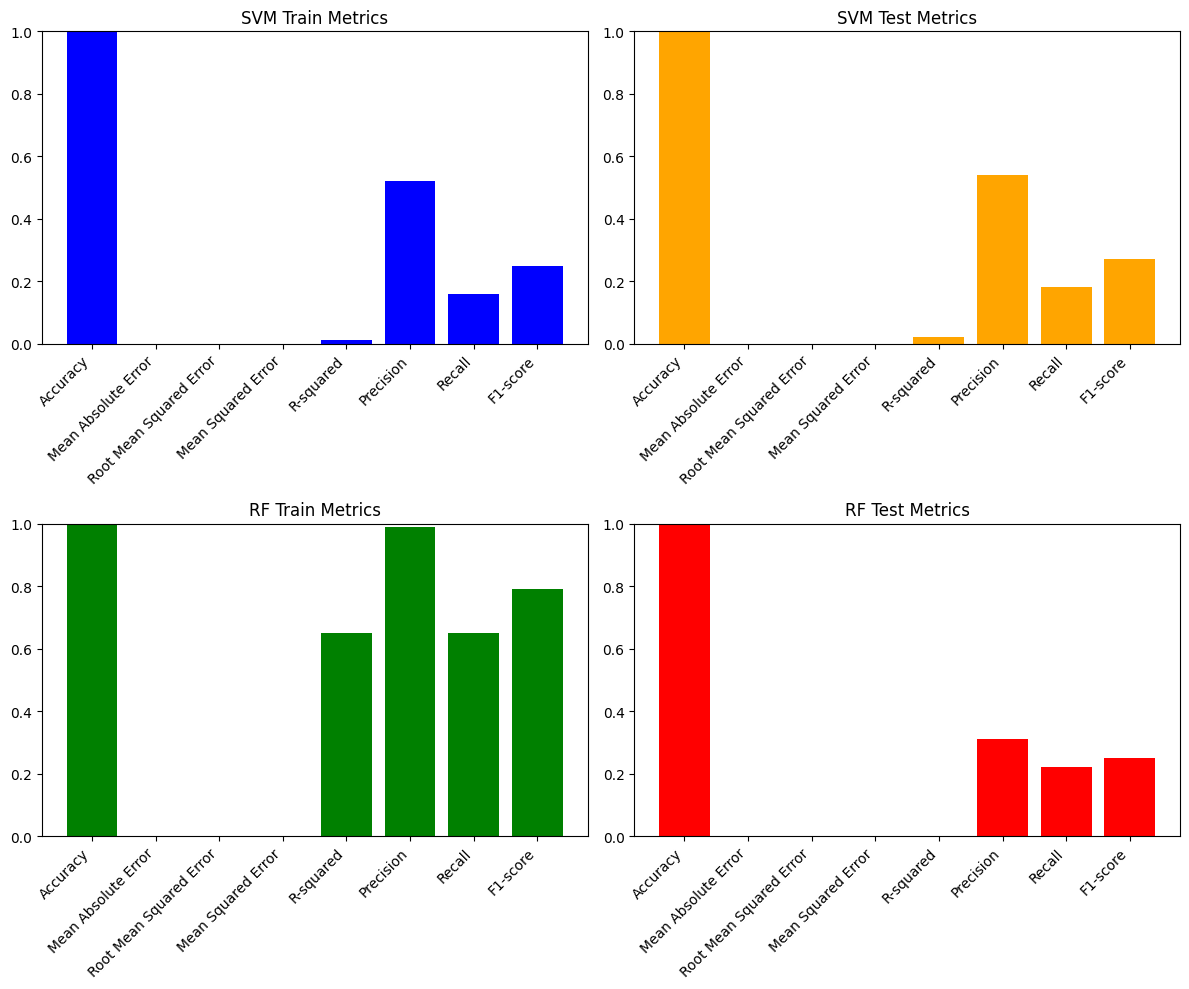

In [36]:
metrics = ['Accuracy', 'Mean Absolute Error', 'Root Mean Squared Error', 'Mean Squared Error', 'R-squared', 'Precision', 'Recall', 'F1-score']

svm_train_values = [1.0, 0.0, 0.0, 0.0, 0.01, 0.52, 0.16, 0.25]

svm_test_values = [1.0, 0.0, 0.0, 0.0, 0.02, 0.54, 0.18, 0.27]

rf_train_values = [1.0, 0.0, 0.0, 0.0, 0.65, 0.99, 0.65, 0.79]
rf_test_values = [1.0, 0.0, 0.0, 0.0, -0.28, 0.31, 0.22, 0.25] 
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].bar(metrics, svm_train_values, color='blue')
axs[0, 0].set_title('SVM Train Metrics')
axs[0, 0].set_ylim(0, 1)
axs[0, 0].set_xticklabels(metrics, rotation=45, ha='right')

axs[0, 1].bar(metrics, svm_test_values, color='orange')
axs[0, 1].set_title('SVM Test Metrics')
axs[0, 1].set_ylim(0, 1)
axs[0, 1].set_xticklabels(metrics, rotation=45, ha='right')

axs[1, 0].bar(metrics, rf_train_values, color='green')
axs[1, 0].set_title('RF Train Metrics')
axs[1, 0].set_ylim(0, 1)
axs[1, 0].set_xticklabels(metrics, rotation=45, ha='right')

axs[1, 1].bar(metrics, rf_test_values, color='red')
axs[1, 1].set_title('RF Test Metrics')
axs[1, 1].set_ylim(0, 1)
axs[1, 1].set_xticklabels(metrics, rotation=45, ha='right')

plt.tight_layout()
plt.show()
